[TOC]

## A. Matplotlib Quick Guide 

### 0. Before we start
1. Make sure you have install python, jupyter notebook and numpy package.
2. Open create a Jupyter notebook file to take note and prepare to try all the codes on your own.
3. Open and simply browse the [Gallery of Matplotlib](https://matplotlib.org/stable/gallery/index.html). See how creative you can be.


### 1. Quick start

#### 1.1 what is matplotlib? what can it do?
Matplotlib is a Python == data visualization library == (a library of drawing functions and objects) for drawing 2D graphics. Matplotlib is built on NumPy arrays (suitable for use with numpy combinations) and is intended to be used with the broader SciPy stack.  
Matplotlib offers many drawing types, including line charts, bar charts, scatter charts, histograms, and more. We can use Matplotlib to visualize the data to better understand trends and patterns in the data.

#### 1.3 Installation
- install using pip: `pip install matplotlib`
- install using conda: `conda install -c conda-forge matplotlib`
  
  
### 2. Simple example
#### 2.1 fundamental step
Create a file called example.py and import pyplot from the matplotlib library, along with numpy.

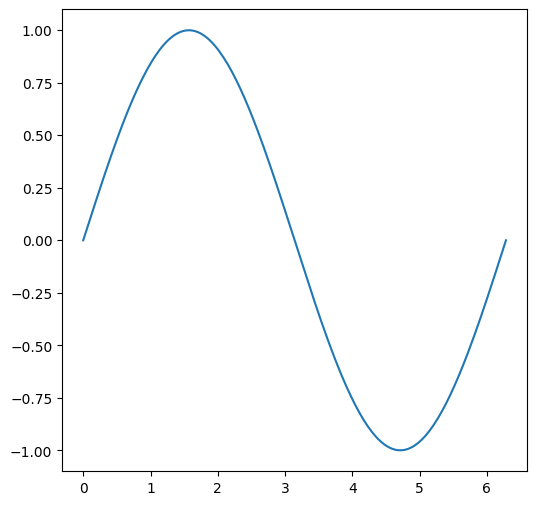

In [42]:
# example.py 
# 导入库
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(6, 6)

# 编写正弦各个点的数据
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

# 运用编写好的numpy数列绘制图线
# 绘制图片
fig, ax = plt.subplots()    #构建对应的图形对象
ax.plot(x, y)   #绘制x-y图线
plt.show()  #展示图像
fig.savefig('y=sinx.png')  #保存图片

------

## B. Understanding the objects in Matplotlib
Reviewing the first line of code in the plotting section of our example.py: `fig, ax = plt.subplots()`. We called the `subplots()` function from matplotlib.pyplot, and this function returns (constructs) two objects:
   - `fig`: The entire drawing figure, which can be seen as the canvas for our graphical image.
   - `ax`: Each subplot containing the coordinate system and data, essentially representing each individual plot.

We can discern the differences between `fig` and `ax` from the following explanation of the `subplots` function:


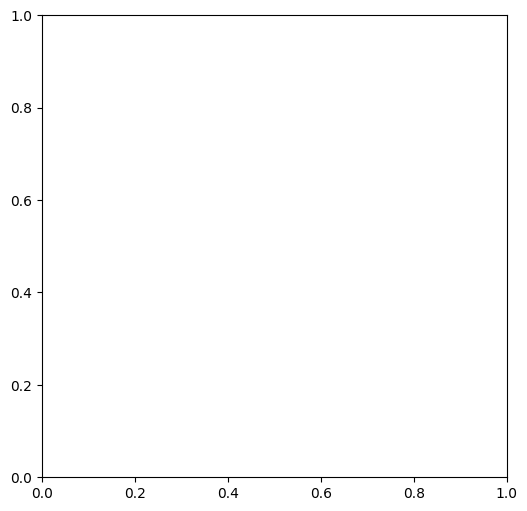

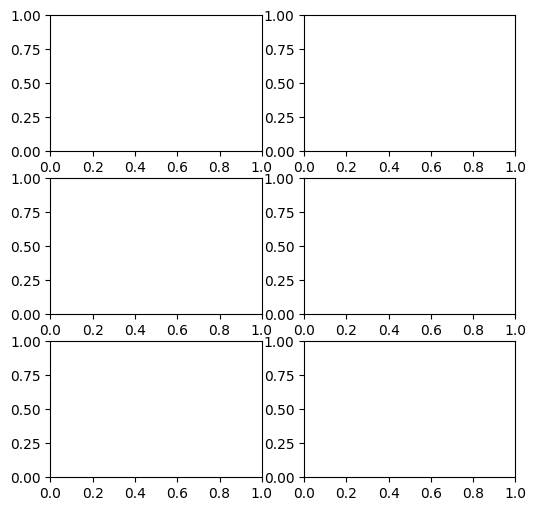

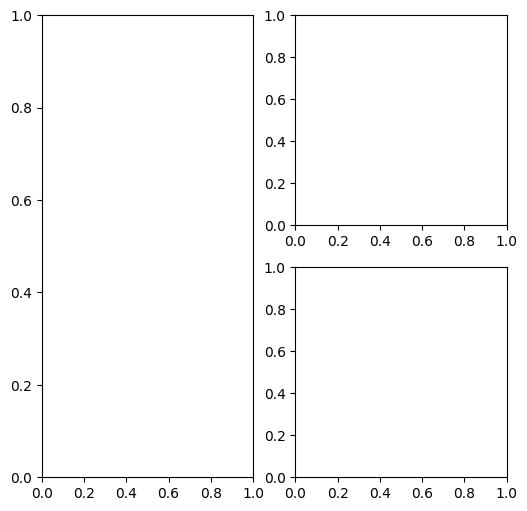

In [43]:
  # 一张图fig，并且图上有默认创建的一个坐标系ax
fig1, ax1 = plt.subplots()

# 一张图fig，6个以3*2方式排列的坐标系数组axs
fig6, ax6 = plt.subplots(3, 2)  

# 一张图fig，3个坐标系按照给入数组的格式排列:
fig3, ax3 = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

---
`fig` is not very commonly used; typically, it is employed as follows:
```python
fig.savefig("filename.png") # Save the image
```
`ax` is the most crucial object for adjusting the format of the coordinate system, offering a plethora of formatting options.

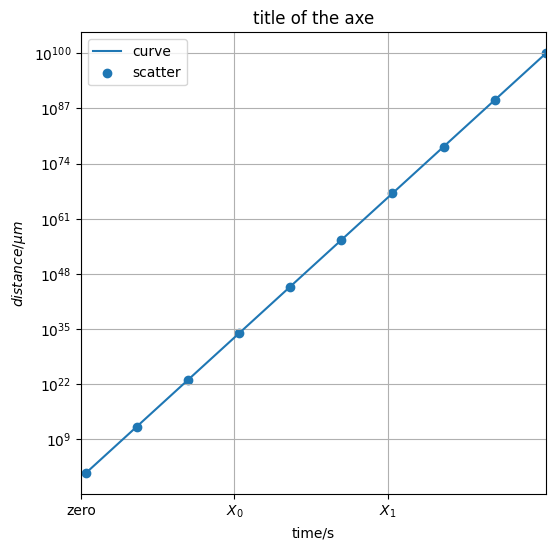

In [44]:
fig, ax = plt.subplots()    #构建对应的图形对象

# 对数函数
x = np.linspace(1,100,10)
y = 10**x

# 画图
ax.plot(x,y,label="curve")     #绘制x-y图线
ax.scatter(x,y,label="scatter")    #绘制x-y散点图
  
# 添加标题  
ax.set_title('title of the axe')    #给坐标系添加标题
ax.set_xlabel('time/s')     #x坐标的标题
ax.set_ylabel(r'$distance/\mu m$')  #y坐标的标题

# 调整绘图坐标轴  
ax.set_xlim([0,100])     #x坐标的范围，这里是从-1到9
#自己设定刻度标定出和相应的刻度值示数：
ax.set_xticks([0,33,66], ['zero', r'$X_0$', r'$X_1$']) 
ax.set_yscale('log')    #坐标标数调整为对数格式

# 其他  
ax.legend()     #自动增加图例
ax.grid()   #自动添加网格

All properties adjusted by methods prefixed with `set_` can be configured using a single method:

In [45]:
# optional choice
ax.set(
    title='title of the axe',
    xlabel='time/s',
    xlim=[0,100]
)

[Text(0.5, 1.0, 'title of the axe'), Text(0.5, 24.0, 'time/s'), (0.0, 100.0)]

---

If there is more than one subplot in a fig, you need to call each subplot object using array indexing. For example:
```python
ax3[0,1].plot()   # Indexing by position
ax6['left'].plot()  # Indexing by name
```

C:\Users\dell\AppData\Local\Temp\ipykernel_31048\75632671.py:9: RuntimeWarning: invalid value encountered in divide
  ax3['right_top'].plot(x,y/x)    # y=(sinx)/x
C:\Users\dell\AppData\Local\Temp\ipykernel_31048\75632671.py:10: RuntimeWarning: divide by zero encountered in divide
  ax3['right_bottom'].plot(1/x,y) # y=sin(1/x)


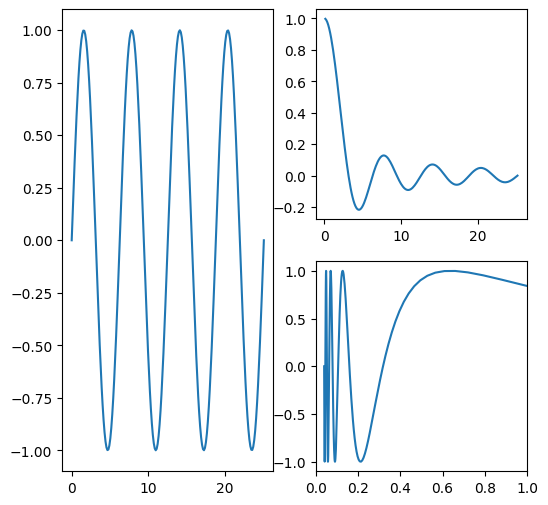

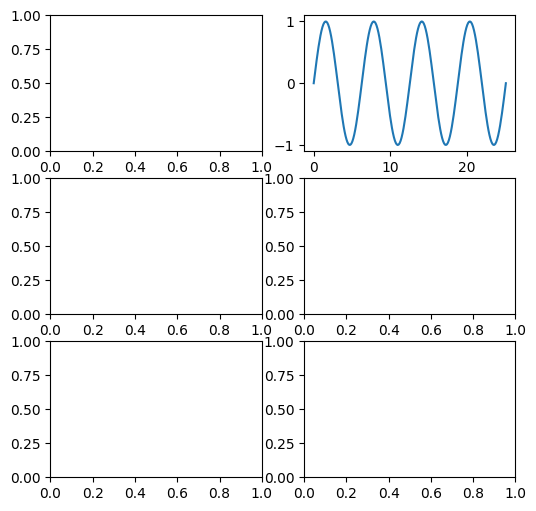

In [46]:
# 用名字索引
fig3, ax3 = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])
# 编写正弦各个点的数据
x = np.linspace(0, 8 * np.pi, 200)
y = np.sin(x)

ax3['left'].plot(x,y)   # y=sinx
ax3['right_top'].plot(x,y/x)    # y=(sinx)/x
ax3['right_bottom'].plot(1/x,y) # y=sin(1/x)
ax3['right_bottom'].set(xlim=[0,1])

# 用序号索引
fig6, ax6 = plt.subplots(3, 2)  # 一张图fig，6个以3*2方式排列的坐标系数组axs

ax6[0,1].plot(x,y)

---  
### Small Cheating Sheet
<img src="pic/2.png" alt="image" width="530" height="500">

## C. Data and Plot Types
### 1. Pairwise Data
#### 1.1. Plot  
Let's review the code in our example.py file:
```python
# Generating data for x and y
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)
#绘制x-y图线
ax.plot(x, y)
```
We can observe that the `plot` function takes two arrays of equal size. It pairs up each element of the first and second arrays to form coordinate points for the plot, connecting these points with a line. Specifically, it represents (x[0],y[0])--(x[1],y[1])--(x[2],y[2])--....--(x[n],y[n]).

If you want to plot more than one curve in a single coordinate system, you can provide two or more sets of arrays.

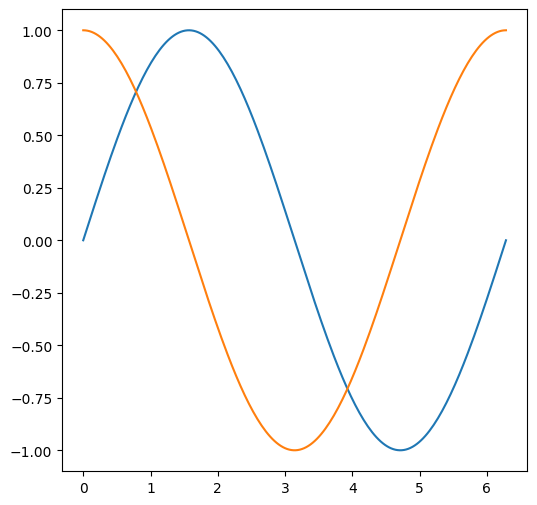

In [47]:
x1 = np.linspace(0, 2 * np.pi, 200)
y1 = np.sin(x1)
x2 = np.linspace(0, 2 * np.pi, 200)
y2 = np.cos(x2)
#绘制图片

fig, ax = plt.subplots()    #构建对应的图形对象
ax.plot(x1,y1,x2,y2)   #绘制x-y图线
plt.show()  #展示图像

#### 1.2 other pairwise plot type
In addition to line plots, you can also create other types of plots such as scatter plots, bar charts, and so on.

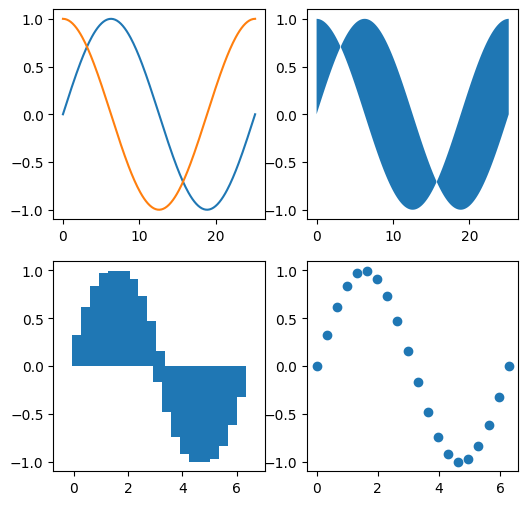

In [48]:
# 用序号索引
fig6, ax6 = plt.subplots(2, 2)  # 一张图fig，6个以3*2方式排列的坐标系数组axs

##################
x1 = np.linspace(0, 2 * np.pi, 200)
y1 = np.sin(x1)
x2 = np.linspace(0, 2 * np.pi, 200)
y2 = np.cos(x2)

ax6[0,0].plot(x,y1,x,y2)    #折线图
ax6[0,1].fill_between(x,y1,y2)    #绘制plot(x,y1,x,y2)，并将两条线之间的空间填满


##################
x1 = np.linspace(0, 2 * np.pi, 20)
y1 = np.sin(x1)

ax6[1,0].bar(x1,y1)  #柱状图，x是每个柱子的位置，y是对应柱子的高度
ax6[1,1].scatter(x1,y1)    #散点图


#### 1.3 plotting with bar
In certain types of plots, the coordinates don't necessarily have to be numerical; they can also be elements from a list of strings. Histograms (`bar`), in particular, offer a lot of flexibility in this regard.

Text(0.5, 1.0, 'Should I enroll in Vg151?')

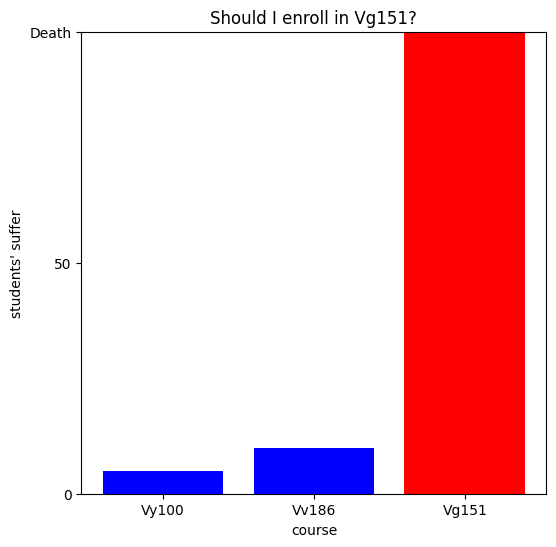

In [49]:
#suffer.py
#导入库
import matplotlib.pyplot as plt
import numpy as np
  
course = ['Vy100','Vv186','Vg151']  # x坐标
suffer = [5,10,1000]    # y坐标

fig, ax = plt.subplots()
ax.bar(course, suffer, color=['b','b','r']) # color参数给出每个bar所对应的颜色

# 一下都是设置坐标内容和范围的代码  
ax.set_yticks([0,50,100],[0,50,'Death'])
ax.set_ylim([0,100])
ax.set_xlabel('course')
ax.set_ylabel('students\' suffer')
# 设置图片题目
ax.set_title('Should I enroll in Vg151?')

### 2. Math plotting
In some cases, when we want to plot an implicit function for which we cannot find an analytical solution, we can use a powerful function called `contour()`.
>:question: To plot the implicit function $$\quad\sin{x}+\cos{y}-0.5=0\quad x,y\in[-5\pi,5\pi]$$
> From a mathematical perspective, we are essentially plotting the contour lines of a bivariate function $F(x,y)=\sin{x}+\cos{y}$ at the level $F(x,y)=0.5$. Since functions are continuous and numpy arrays are discrete, we need to discretize the continuous plane into many individual coordinates $(x_i,y_j)$ and store them in a numpy two-dimensional array. More directly, we can also separate the x and y coordinates into two two-dimensional arrays, $X$ and $Y$.

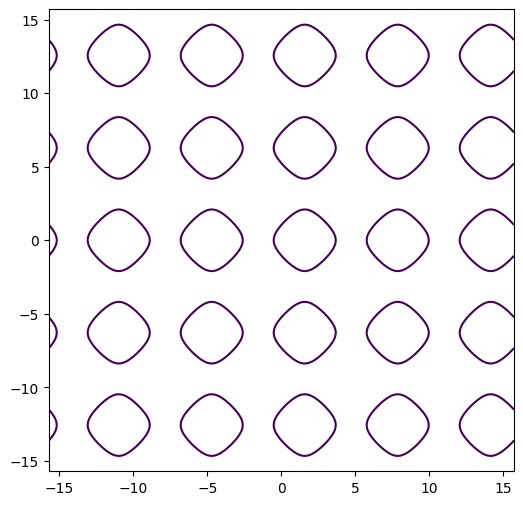

In [50]:
#contour.py

#导入matplotlib和numpy
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5*np.pi,5*np.pi,1000)    #将-10~10的空间长度分割为1000份
X,Y = np.meshgrid(x,x)  #X,Y分别表示每个坐标点的x和y轴坐标
F = np.sin(X)+np.cos(Y) #函数F的值和在此处的坐标x，y的关系
#绘制图像
fig,ax = plt.subplots()
ax.contour(X,Y,F,levels=[0.5])  #绘制图像，levels=[0.5]表示让F的值为0.5
#图像预览
plt.show()

If the length from -10 to 10 is divided into only 10 parts, what will it looks like. Try using `x = np.linspace(-5*np.pi,5*np.pi,10)`.   
$\Rightarrow$ If the discretization is too coarse, the function will be severely distorted.

## E. Q&A

> Q: How to learn and train matplotlib well?

The best way to learn and train your skill is to use the tool frequently. Here are some cases where you will find matplotlib necessary:
- Write you chemistry/physics report.
- Compete in any competition e.g. UPC, MCM.
- Prepare your presentation.
- Do your math homework.

> Q: I feel that matplotlib is so complicated! I don't want to bother with the complicated code. I just want nice looking figure as quick as possible.  

That is totally possible! Actually, most of people do not write their matplotlib code from scratch (just like nobody will make a template just to write his essay with $LATEX$). Find all kinds of  templates of matplotlib in the [Gallery](https://matplotlib.org/stable/gallery/index.html) and fill in your data!

> I have so much requirement for my plot beyond those templates, where can I get help?  

- Hard but specific: Search in the official [Document](https://matplotlib.org/stable/)
- Easy and recommended: Ask Bing or ChatGPT. 

## REFERENCE
[Manual](https://matplotlib.org/stable/ )  
[Quick Guide](https://matplotlib.org/stable/users/explain/quick_start.html# )  
[Sample plot types](https://matplotlib.org/stable/plot_types/index.html )  
[Gallery](https://matplotlib.org/stable/gallery/index.html )  
[Cheat Sheet](https://matplotlib.org/cheatsheets/ )  